In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers 
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import codecs
import pandas as pd
from konlpy.tag import Okt
with codecs.open('ratings_test.txt',encoding='utf-8') as f:
    data=[i.split('\t') for i in f.read().splitlines()]
    m=data[0]
    data=data[1:]
p_data=pd.DataFrame(data,columns=m)
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


데이터 전처리 -> 학습하기 위한 data로 정리하는 작업

결측치 확인

In [2]:
print(p_data.document.isnull())
p_data.loc[p_data.document.isnull()]

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: document, Length: 50000, dtype: bool


,id,document,label


In [3]:
len(p_data.document.unique())

49158

In [4]:
len(p_data)

50000

In [5]:
p_data=p_data.drop_duplicates(subset=['document'])#subset :조건, drop_duplicates 제거해주겠다/ document내부의 중복값 제거

In [6]:
len(p_data)

49158

In [7]:
p_data.document.isnull().sum()

0

In [8]:
p_data['document']=p_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')#공적인 단어에서 ㅋ은 의미없는단어, 리뷰에선 의미있는 단어
#공백이 의미를 가지고 표현되고있다. null로 표현되지않고 공백으로서 문자로 취급되어있다.

C:\Users\류성빈\AppData\Local\Temp/ipykernel_2728/3502843773.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  p_data['document']=p_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')#공적인 단어에서 ㅋ은 의미없는단어, 리뷰에선 의미있는 단어
C:\Users\류성빈\AppData\Local\Temp/ipykernel_2728/3502843773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['document']=p_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')#공적인 단어에서 ㅋ은 의미없는단어, 리뷰에선 의미있는 단어


In [9]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [10]:
p_data['document']=p_data.document.str.replace('^ +','') # 시작지점 앞 공백 제거

C:\Users\류성빈\AppData\Local\Temp/ipykernel_2728/329665316.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  p_data['document']=p_data.document.str.replace('^ +','') # 시작지점 앞 공백 제거
C:\Users\류성빈\AppData\Local\Temp/ipykernel_2728/329665316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['document']=p_data.document.str.replace('^ +','') # 시작지점 앞 공백 제거


In [11]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [12]:
import numpy as np
p_data['document']=p_data.document.replace('',np.nan)

C:\Users\류성빈\AppData\Local\Temp/ipykernel_2728/3038695718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['document']=p_data.document.replace('',np.nan)


In [13]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,NaN,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [14]:
p_data=p_data.dropna(how='any')#any 하나도 있으면 기본값 행 => axis=0

In [15]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
5,7898805,음악이 주가 된 최고의 음악영화,1
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [16]:
s_w=['은','는','이','가','를','들','에게','의','를','도','으로','만','라서','한다']

In [17]:
okt=Okt()

In [18]:
tk_d=okt.morphs(p_data.document[2])

In [19]:
[w for w in tk_d if not w in s_w]

['뭐', '야', '평점', '나쁘진', '않지만', '점', '짜', '리', '더', '더욱', '아니잖아']

In [20]:
from tqdm import tqdm
X_data=[]
for i in tqdm(p_data.document):
    tk_d=okt.morphs(i)
    end_d=[w for w in tk_d if not w in s_w]
    X_data.append(end_d)
X_data

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48852/48852 [03:53<00:00, 209.13it/s]


[['굳', 'ㅋ'],
 ['뭐', '야', '평점', '나쁘진', '않지만', '점', '짜', '리', '더', '더욱', '아니잖아'],
 ['지루하지는', '않은데', '완전', '막장', '임', '돈', '주고', '보기', '에는'],
 ['아니었어도', '별', '다섯', '개', '줬을텐데', '왜', '로', '나와서', '제', '심기', '불편하게', '하죠'],
 ['음악', '주가', '된', '최고', '음악', '영화'],
 ['진정한', '쓰레기'],
 ['마치',
  '미국',
  '애니',
  '에서',
  '튀어나온듯',
  '한',
  '창의력',
  '없는',
  '로봇',
  '디자인',
  '부터가',
  '고개',
  '젖게'],
 ['갈수록',
  '개판',
  '되가는',
  '중국영화',
  '유치하고',
  '내용',
  '없음',
  '폼',
  '잡다',
  '끝남',
  '말',
  '안되는',
  '무기',
  '에',
  '유치한',
  '남무',
  '아',
  '그립다',
  '동사서독',
  '같은',
  '영화',
  '이건',
  '류',
  '아',
  '류작',
  '이다'],
 ['이별', '아픔', '뒤', '에', '찾아오는', '새로운', '인연', '기쁨', '모든', '사람', '그렇지는', '않네'],
 ['괜찮네요', '오랜', '포켓몬스터', '잼밌', '어', '요'],
 ['한국', '독립영화', '한계', '그렇게', '아버지', '된다와', '비교', '됨'],
 ['청춘',
  '아름답다',
  '그',
  '아름다',
  '움',
  '이성',
  '을',
  '흔들어',
  '놓는다',
  '찰나',
  '아름다',
  '움',
  '을',
  '잘',
  '포착',
  '한',
  '섬세하고',
  '아름다운',
  '수채화',
  '같은',
  '퀴어',
  '영화',
  '이다'],
 ['눈', '에', '보이는', '반전', '이었지만', '영화', '

In [21]:
tk=Tokenizer()
tk.fit_on_texts(X_data)
tk.word_index

{'영화': 1,
 '에': 2,
 '을': 3,
 '너무': 4,
 '한': 5,
 '다': 6,
 '정말': 7,
 '진짜': 8,
 '적': 9,
 '로': 10,
 '점': 11,
 '에서': 12,
 '평점': 13,
 '연기': 14,
 '것': 15,
 '과': 16,
 '내': 17,
 '최고': 18,
 '그': 19,
 '인': 20,
 '잘': 21,
 '안': 22,
 '나': 23,
 '와': 24,
 '생각': 25,
 '이런': 26,
 '게': 27,
 '못': 28,
 '왜': 29,
 '스토리': 30,
 '이다': 31,
 '드라마': 32,
 '사람': 33,
 '감동': 34,
 '하는': 35,
 '보고': 36,
 '때': 37,
 '더': 38,
 '하고': 39,
 '고': 40,
 '말': 41,
 '감독': 42,
 '배우': 43,
 'ㅋㅋ': 44,
 '아': 45,
 '그냥': 46,
 '내용': 47,
 '거': 48,
 '까지': 49,
 '중': 50,
 '재미': 51,
 '보다': 52,
 '본': 53,
 '시간': 54,
 '요': 55,
 '없는': 56,
 '좀': 57,
 '뭐': 58,
 '수': 59,
 '지': 60,
 '네': 61,
 '봤는데': 62,
 '쓰레기': 63,
 '사랑': 64,
 '볼': 65,
 '작품': 66,
 '다시': 67,
 '하나': 68,
 '없다': 69,
 '할': 70,
 '마지막': 71,
 'ㅠㅠ': 72,
 '이건': 73,
 '저': 74,
 '같은': 75,
 '정도': 76,
 '있는': 77,
 '좋은': 78,
 '완전': 79,
 '처음': 80,
 'ㅋ': 81,
 '장면': 82,
 '주인공': 83,
 'ㅋㅋㅋ': 84,
 '이렇게': 85,
 '입니다': 86,
 '액션': 87,
 '하': 88,
 '최악': 89,
 '걸': 90,
 '보는': 91,
 '이야기': 92,
 '지금': 93,
 '끝': 94,
 'ㅡㅡ'

In [22]:
tk.word_counts

OrderedDict([('굳', 124),
             ('ㅋ', 811),
             ('뭐', 1178),
             ('야', 508),
             ('평점', 2210),
             ('나쁘진', 12),
             ('않지만', 46),
             ('점', 2531),
             ('짜', 82),
             ('리', 106),
             ('더', 1509),
             ('더욱', 94),
             ('아니잖아', 29),
             ('지루하지는', 4),
             ('않은데', 24),
             ('완전', 813),
             ('막장', 228),
             ('임', 702),
             ('돈', 696),
             ('주고', 197),
             ('보기', 552),
             ('에는', 355),
             ('아니었어도', 6),
             ('별', 634),
             ('다섯', 36),
             ('개', 698),
             ('줬을텐데', 2),
             ('왜', 1706),
             ('로', 2648),
             ('나와서', 133),
             ('제', 491),
             ('심기', 1),
             ('불편하게', 10),
             ('하죠', 7),
             ('음악', 390),
             ('주가', 16),
             ('된', 545),
             ('최고', 1950),
             ('영화', 1723

In [23]:
len(tk.word_index)

54257

In [24]:
ck_data1=list(tk.word_counts.items())
ck_data1

[('굳', 124),
 ('ㅋ', 811),
 ('뭐', 1178),
 ('야', 508),
 ('평점', 2210),
 ('나쁘진', 12),
 ('않지만', 46),
 ('점', 2531),
 ('짜', 82),
 ('리', 106),
 ('더', 1509),
 ('더욱', 94),
 ('아니잖아', 29),
 ('지루하지는', 4),
 ('않은데', 24),
 ('완전', 813),
 ('막장', 228),
 ('임', 702),
 ('돈', 696),
 ('주고', 197),
 ('보기', 552),
 ('에는', 355),
 ('아니었어도', 6),
 ('별', 634),
 ('다섯', 36),
 ('개', 698),
 ('줬을텐데', 2),
 ('왜', 1706),
 ('로', 2648),
 ('나와서', 133),
 ('제', 491),
 ('심기', 1),
 ('불편하게', 10),
 ('하죠', 7),
 ('음악', 390),
 ('주가', 16),
 ('된', 545),
 ('최고', 1950),
 ('영화', 17231),
 ('진정한', 108),
 ('쓰레기', 1068),
 ('마치', 68),
 ('미국', 216),
 ('애니', 293),
 ('에서', 2330),
 ('튀어나온듯', 1),
 ('한', 3726),
 ('창의력', 2),
 ('없는', 1200),
 ('로봇', 36),
 ('디자인', 19),
 ('부터가', 27),
 ('고개', 13),
 ('젖게', 2),
 ('갈수록', 189),
 ('개판', 59),
 ('되가는', 1),
 ('중국영화', 28),
 ('유치하고', 74),
 ('내용', 1347),
 ('없음', 304),
 ('폼', 19),
 ('잡다', 2),
 ('끝남', 23),
 ('말', 1445),
 ('안되는', 192),
 ('무기', 25),
 ('에', 9254),
 ('유치한', 58),
 ('남무', 1),
 ('아', 1375),
 ('그립다', 26),
 ('동사서독

In [25]:
ck_data2=sorted(ck_data1,key=lambda x:x[1])
ck_data2

[('심기', 1),
 ('튀어나온듯', 1),
 ('되가는', 1),
 ('남무', 1),
 ('잼밌', 1),
 ('된다와', 1),
 ('찍고도', 1),
 ('김문옥', 1),
 ('빠져있겠지', 1),
 ('나이스', 1),
 ('챔프', 1),
 ('해냈던', 1),
 ('헬레', 1),
 ('갈고리', 1),
 ('고어씬', 1),
 ('돋기는', 1),
 ('받을수밖에', 1),
 ('분출', 1),
 ('지저분하게', 1),
 ('늘어놓았다', 1),
 ('긁어', 1),
 ('름', 1),
 ('보이던데', 1),
 ('까지면서', 1),
 ('나오려', 1),
 ('당했을', 1),
 ('뻔했으니', 1),
 ('봐으면', 1),
 ('왤까', 1),
 ('이율', 1),
 ('코헨', 1),
 ('하시겟지만', 1),
 ('솔직히말해', 1),
 ('채안', 1),
 ('깔리고', 1),
 ('풀해', 1),
 ('졌어', 1),
 ('만들겠', 1),
 ('다미앙', 1),
 ('세계보건기구', 1),
 ('들어갔다가', 1),
 ('크보', 1),
 ('ㅋㄲㅈㅁ', 1),
 ('돼야지', 1),
 ('있다나', 1),
 ('슈래기', 1),
 ('벗겨놓고', 1),
 ('터전', 1),
 ('잃을만큼', 1),
 ('보러가는게', 1),
 ('중요했을까', 1),
 ('ㅠㅜㅜㅜ', 1),
 ('돈키호테', 1),
 ('달려드는데', 1),
 ('쌩까는게', 1),
 ('퐁당', 1),
 ('빠졌다', 1),
 ('찰지구나', 1),
 ('아찔한', 1),
 ('끊기는것', 1),
 ('들고다니는데', 1),
 ('사별', 1),
 ('지났다고', 1),
 ('쪼르르', 1),
 ('츠지', 1),
 ('아름답던', 1),
 ('지겨울수가', 1),
 ('펑퍼짐한', 1),
 ('건빵', 1),
 ('카고를', 1),
 ('오도바이', 1),
 ('공겸', 1),
 ('구사해', 1),
 ('린줄', 1),
 ('용하는데', 1),
 (

In [26]:
ck_data3=[d for d in ck_data2 if d[1]>4]

In [27]:
ck_data3

[('흡인', 5),
 ('나이트메어', 5),
 ('양산', 5),
 ('찡하네요', 5),
 ('더잘', 5),
 ('갔나', 5),
 ('들에게', 5),
 ('있으며', 5),
 ('콩콩', 5),
 ('되지도', 5),
 ('관객모독', 5),
 ('탐험', 5),
 ('강렬하고', 5),
 ('어땠는지', 5),
 ('힘들었지만', 5),
 ('괴담', 5),
 ('찌라시', 5),
 ('대입', 5),
 ('적응', 5),
 ('유쾌함', 5),
 ('만들었어', 5),
 ('어요', 5),
 ('달려', 5),
 ('어설픔', 5),
 ('졌다', 5),
 ('미쉘', 5),
 ('닦고', 5),
 ('이즈', 5),
 ('라울', 5),
 ('가공', 5),
 ('맡아', 5),
 ('찍어라', 5),
 ('파일', 5),
 ('저따위', 5),
 ('기리', 5),
 ('개개인', 5),
 ('잼슴', 5),
 ('당함', 5),
 ('후의', 5),
 ('노다메', 5),
 ('벤자민', 5),
 ('보시는게', 5),
 ('없었네요', 5),
 ('소수자', 5),
 ('있답니다', 5),
 ('애잔한', 5),
 ('어떨', 5),
 ('찾아가는', 5),
 ('행복하다', 5),
 ('불편함', 5),
 ('느낀건', 5),
 ('모르겠는', 5),
 ('아껴서', 5),
 ('와아', 5),
 ('빛났다', 5),
 ('먹은거', 5),
 ('무리한', 5),
 ('마사미', 5),
 ('한채영', 5),
 ('했다는게', 5),
 ('해변', 5),
 ('폐인', 5),
 ('텅', 5),
 ('웃길려고', 5),
 ('노처녀', 5),
 ('손현주', 5),
 ('바꿔야', 5),
 ('장구', 5),
 ('멍청하고', 5),
 ('흰둥이', 5),
 ('있단', 5),
 ('알았네요', 5),
 ('구체', 5),
 ('매기', 5),
 ('얻었다', 5),
 ('잔건', 5),
 ('해당', 5),
 ('왜인', 5),
 ('

In [28]:
len(ck_data3)

10420

In [29]:
tk=Tokenizer(10420)#단어의 개수가 한정되었다.
tk.fit_on_texts(X_data)
len(tk.word_index)#토큰이 다 기억은 하고있지만 쪼갤때 10420으로 한정해서 진행한다.

54257

In [30]:
ck_x=tk.texts_to_sequences(X_data)#인덱스 목록 생성
np.unique(ck_x)#개수를 한정해서 비워진 리스트가 존재하게된다 그렇기에 이를 빼줘야한다.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


array([list([]), list([1]),
       list([1, 1, 19, 189, 10, 345, 1004, 5096, 608, 128, 1590, 20, 202, 517, 1470, 171, 144, 4538, 517]),
       ..., list([10417, 294, 5004, 12]), list([10417, 4640, 5756]),
       list([10419, 10419, 10419, 10419, 10419, 832])], dtype=object)

In [31]:
len(np.unique([k for i in ck_x for k in i]))

10419

In [32]:
len(p_data.label)

48852

In [33]:
len(p_data.document)

48852

In [34]:
len(X_data)

48852

In [35]:
len(ck_x)

48852

In [36]:
s_df=pd.DataFrame()
s_df['document']=p_data.document
s_df['label']=p_data.label
s_df

,document,label
0,굳 ㅋ,1
2,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
5,음악이 주가 된 최고의 음악영화,1
...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [37]:
d_x=[i for i,n in enumerate(ck_x) if len(n)<1]

In [38]:

for i in enumerate(ck_x):
    print(i)
    if i[0]==5:
        break

(0, [636, 81])
(1, [58, 151, 13, 4671, 1556, 11, 947, 743, 38, 836, 2343])
(2, [2743, 79, 353, 98, 101, 408, 134, 212])
(3, [7860, 119, 1942, 99, 29, 10, 590, 156, 5408, 7025])
(4, [195, 3737, 136, 18, 195, 1])
(5, [722, 63])


In [39]:
ck_x[1]

[58, 151, 13, 4671, 1556, 11, 947, 743, 38, 836, 2343]

In [40]:
X_data[1]

['뭐', '야', '평점', '나쁘진', '않지만', '점', '짜', '리', '더', '더욱', '아니잖아']

In [41]:
Y_data=np.array(p_data.label)
Y_data

array(['1', '0', '0', ..., '0', '0', '0'], dtype=object)

In [42]:
d_x

[17,
 172,
 220,
 297,
 395,
 542,
 589,
 997,
 1569,
 1590,
 1597,
 2236,
 2280,
 2305,
 2373,
 2584,
 2860,
 3046,
 3101,
 3213,
 3297,
 3396,
 3482,
 3545,
 3576,
 3730,
 3788,
 3814,
 4192,
 4951,
 5162,
 5207,
 5241,
 5672,
 5814,
 5884,
 6150,
 6532,
 6667,
 6850,
 6856,
 6992,
 7060,
 7070,
 7181,
 7298,
 7724,
 7760,
 7938,
 7981,
 8211,
 8268,
 8323,
 8393,
 8553,
 8784,
 8932,
 8966,
 8988,
 9314,
 9367,
 9437,
 9791,
 9901,
 10381,
 10502,
 10928,
 10981,
 11039,
 11263,
 11361,
 11417,
 11487,
 11969,
 11981,
 12609,
 12846,
 12907,
 12927,
 12981,
 13023,
 13034,
 13143,
 13449,
 13880,
 13918,
 13935,
 13945,
 14097,
 14153,
 14253,
 14477,
 14708,
 14868,
 15056,
 15340,
 15375,
 15706,
 15729,
 15738,
 15850,
 16504,
 16569,
 16658,
 16877,
 17085,
 17306,
 17332,
 17465,
 17560,
 17586,
 17601,
 17703,
 17805,
 17853,
 17924,
 18059,
 18302,
 18734,
 18918,
 19035,
 19241,
 19258,
 19301,
 19302,
 19484,
 19513,
 19553,
 19556,
 19715,
 19765,
 19936,
 20267,
 20364,
 

In [43]:
p_data.document[17]

'발연기 도저히 못보겠다 진짜 이렇게 연기를 못할거라곤 상상도 못했네'

In [44]:
ck_x[17]

[]

In [45]:
len(X_data),len(Y_data)

(48852, 48852)

In [46]:
tk=Tokenizer(num_words=10420)
tk.fit_on_texts(X_data)
X_data=tk.texts_to_sequences(X_data)
Y_data=np.array(p_data.label)

In [47]:
len(X_data),len(Y_data)

(48852, 48852)

In [48]:
d_idx=[i for i,n in enumerate(ck_x) if len(n)<1]

In [49]:
X_data=np.delete(X_data,d_idx,axis=0)
Y_data=np.delete(Y_data,d_idx,axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [50]:
len(X_data),len(Y_data)

(48535, 48535)

In [51]:
np.unique(X_data)

array([list([1]),
       list([1, 1, 19, 189, 10, 345, 1004, 5096, 608, 128, 1590, 20, 202, 517, 1470, 171, 144, 4538, 517]),
       list([1, 1, 200, 17, 335, 64, 35, 2364, 29, 26, 63, 1, 10, 6836, 467]),
       ..., list([10417, 294, 5004, 12]), list([10417, 4640, 5756]),
       list([10419, 10419, 10419, 10419, 10419, 832])], dtype=object)

In [55]:
max([len(i) for i in X_data]),min([len(i) for i in X_data])

(59, 1)

In [52]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
ck1_data=pad_sequences(X_data)
len(ck1_data[0])

59

In [64]:
ck1_y=to_categorical(Y_data)

In [65]:
ck1_y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [57]:
ck_df=pd.DataFrame(X_data)
ck_df

,0
0,"[636, 81]"
1,"[58, 151, 13, 4671, 1556, 11, 947, 743, 38, 83..."
2,"[2743, 79, 353, 98, 101, 408, 134, 212]"
3,"[7860, 119, 1942, 99, 29, 10, 590, 156, 5408, ..."
4,"[195, 3737, 136, 18, 195, 1]"
...,...
48530,"[309, 2, 13, 10, 923, 2038, 44, 6458, 5, 1, 10..."
48531,"[3261, 137, 6308, 904, 83, 7108, 3696, 1015]"
48532,"[731, 266, 830, 5104, 91, 259, 1390]"
48533,"[370, 283, 1540, 22, 422, 1, 51, 97, 240, 2072..."


In [58]:
ck_df=pd.DataFrame(ck1_data)
ck_df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,636,81
1,0,0,0,0,0,0,0,0,0,0,...,151,13,4671,1556,11,947,743,38,836,2343
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2743,79,353,98,101,408,134,212
3,0,0,0,0,0,0,0,0,0,0,...,7860,119,1942,99,29,10,590,156,5408,7025
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,195,3737,136,18,195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48530,0,0,0,0,0,0,0,0,0,0,...,2,13,10,923,2038,44,6458,5,1,10256
48531,0,0,0,0,0,0,0,0,0,0,...,0,0,3261,137,6308,904,83,7108,3696,1015
48532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,731,266,830,5104,91,259,1390
48533,0,0,0,0,0,0,0,0,0,0,...,97,240,2072,705,5,4403,637,12,6,61


In [59]:
ck_df=pd.DataFrame(Y_data)
ck_df['Y']=Y_data

,0
0,1
1,0
2,0
3,0
4,1
...,...
48530,1
48531,0
48532,0
48533,0


In [61]:
ck_df=pd.DataFrame(ck1_data)
ck_df['Y']=Y_data
ck_df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,636,81,1
1,0,0,0,0,0,0,0,0,0,0,...,13,4671,1556,11,947,743,38,836,2343,0
2,0,0,0,0,0,0,0,0,0,0,...,0,2743,79,353,98,101,408,134,212,0
3,0,0,0,0,0,0,0,0,0,0,...,119,1942,99,29,10,590,156,5408,7025,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,195,3737,136,18,195,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48530,0,0,0,0,0,0,0,0,0,0,...,13,10,923,2038,44,6458,5,1,10256,1
48531,0,0,0,0,0,0,0,0,0,0,...,0,3261,137,6308,904,83,7108,3696,1015,0
48532,0,0,0,0,0,0,0,0,0,0,...,0,0,731,266,830,5104,91,259,1390,0
48533,0,0,0,0,0,0,0,0,0,0,...,240,2072,705,5,4403,637,12,6,61,0


In [67]:
t_x,tt_x,t_y,tt_y=train_test_split(ck1_data,ck1_y,random_state=1)
t_x.shape,tt_x.shape,t_y.shape,tt_y.shape

((36401, 59), (12134, 59), (36401, 2), (12134, 2))

In [72]:
ck_m=Sequential()
ck_m.add(Dense(2,input_shape=(59,),activation='sigmoid'))
ck_m.compile(optimizer='adam',loss = 'binary_crossentropy',
          metrics=['binary_accuracy'])
hy=ck_m.fit(t_x,t_y,epochs=10,validation_data=(tt_x,tt_y))

Epoch 1/10
1138/1138 [==============================] - 2s 1ms/step - loss: 90.4890 - binary_accuracy: 0.5018 - val_loss: 7.6813 - val_binary_accuracy: 0.4947
Epoch 2/10
1138/1138 [==============================] - 1s 1ms/step - loss: 4.3688 - binary_accuracy: 0.4981 - val_loss: 3.7599 - val_binary_accuracy: 0.4988
Epoch 3/10
1138/1138 [==============================] - 1s 1ms/step - loss: 2.9028 - binary_accuracy: 0.4983 - val_loss: 3.2298 - val_binary_accuracy: 0.4961
Epoch 4/10
1138/1138 [==============================] - 1s 989us/step - loss: 2.7795 - binary_accuracy: 0.4997 - val_loss: 3.6077 - val_binary_accuracy: 0.4974
Epoch 5/10
1138/1138 [==============================] - 1s 945us/step - loss: 2.7311 - binary_accuracy: 0.5056 - val_loss: 2.7866 - val_binary_accuracy: 0.4974
Epoch 6/10
1138/1138 [==============================] - 1s 1ms/step - loss: 2.7153 - binary_accuracy: 0.5024 - val_loss: 2.4558 - val_binary_accuracy: 0.5055
Epoch 7/10
1138/1138 [=========================

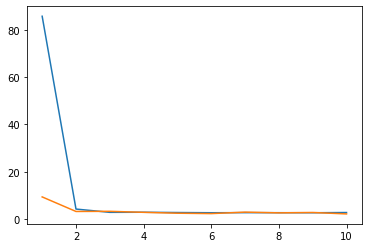

In [71]:
x=range(1,len(hy.history['loss'])+1)
plt.plot(x,hy.history['loss'])
plt.plot(x,hy.history['val_loss'])

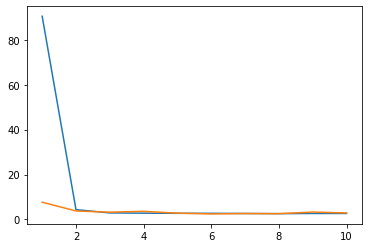

In [73]:
#전체적인 데이터에서 의미없는 데이터가 담김
#연관성의 요소들이 너무 작아졌다.
x=range(1,len(hy.history['loss'])+1)
plt.plot(x,hy.history['loss'])
plt.plot(x,hy.history['val_loss'])

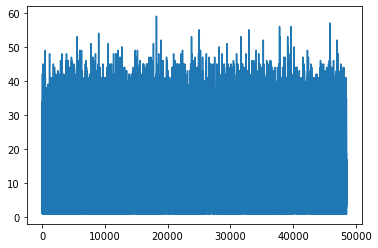

In [75]:
ck_n=[len(i) for i in X_data]
plt.plot(ck_n)

In [76]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_data=pad_sequences(X_data,maxlen=35)#얼마만큼으로 쓸건지: maxlen
X_data.shape

(48535, 35)

In [78]:
Y_data

array(['1', '0', '0', ..., '0', '0', '0'], dtype=object)

In [90]:
Y_data=Y_data.astype(int)

In [92]:
t_x,tt_x,t_y,tt_y=train_test_split(X_data,Y_data,random_state=1)

In [101]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)
m_ck=ModelCheckpoint('best_m.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

In [102]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
end_m=Sequential()
end_m.add(Embedding(10420,100))#임베딩층을 먼저 쌓는다. 즉 벡터화작업이다. 
end_m.add(LSTM(128))
end_m.add(Dense(1,activation='sigmoid'))
end_m.compile(optimizer='rmsprop',loss = 'binary_crossentropy',
          metrics=['binary_accuracy'])

In [103]:
hy=end_m.fit(t_x,t_y,epochs=12,callbacks=[es,m_ck],batch_size=64,validation_data=(tt_x,tt_y))

Epoch 1/12
569/569 [==============================] - 26s 43ms/step - loss: 0.4579 - binary_accuracy: 0.7819 - val_loss: 0.4030 - val_binary_accuracy: 0.8199
Epoch 2/12
569/569 [==============================] - 25s 43ms/step - loss: 0.3510 - binary_accuracy: 0.8463 - val_loss: 0.3824 - val_binary_accuracy: 0.8279
Epoch 3/12
569/569 [==============================] - 26s 47ms/step - loss: 0.3238 - binary_accuracy: 0.8607 - val_loss: 0.3793 - val_binary_accuracy: 0.8283
Epoch 4/12
569/569 [==============================] - 26s 46ms/step - loss: 0.3029 - binary_accuracy: 0.8696 - val_loss: 0.4137 - val_binary_accuracy: 0.8279
Epoch 5/12
569/569 [==============================] - 25s 44ms/step - loss: 0.2830 - binary_accuracy: 0.8801 - val_loss: 0.3977 - val_binary_accuracy: 0.8332
Epoch 6/12
569/569 [==============================] - 26s 46ms/step - loss: 0.2599 - binary_accuracy: 0.8920 - val_loss: 0.3962 - val_binary_accuracy: 0.8302
Epoch 7/12
569/569 [==============================] 

In [104]:
ck_m_end=load_model('best_m.h5')

OSError: SavedModel file does not exist at: best_m.h5\{saved_model.pbtxt|saved_model.pb}

In [105]:
ck_m_end.evaluate(tt_x,tt_y)

NameError: name 'ck_m_end' is not defined

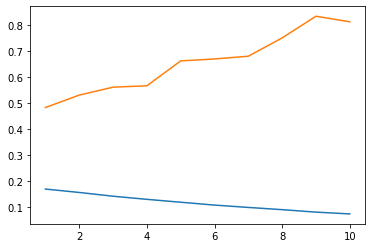

In [97]:
x=range(1,len(hy.history['loss'])+1)
plt.plot(x,hy.history['loss'])
plt.plot(x,hy.history['val_loss'])